# **Master Feature Selection Part 2: Wrapper Methods**

![alt text](1_uc_wt_Luk5BVnZxU2M36Ug-1.jpg)

# Understanding the Importance of Feature Selection

In machine learning, datasets often come with numerous features, varying in their relevance to the model's performance. Identifying key features is crucial, as it determines the effectiveness and efficiency of the machine learning model.

# What are Wrapper Methods?

Wrapper methods are algorithms designed for feature selection. They assess the significance of different feature subsets by evaluating the performance of a machine learning model. These methods iteratively add or remove features, gauging their utility based on the model's performance.

# Advantages Over Filter Methods

- Model-Specific Evaluation: Unlike filter methods, which assess features independently of the model, wrapper methods evaluate features based on their contribution to a specific model.
- Detecting Feature Interactions: Wrapper methods can identify powerful feature combinations. They recognize that some features, while not impactful alone, can significantly enhance model performance when used together.

# Exploring Various Wrapper Methods

This lesson will delve into five wrapper methods:
- Sequential Forward Selection
- Sequential Backward Selection
- Sequential Forward Floating Selection
- Sequential Backward Floating Selection
- Recursive Feature Elimination

# Preparing for Wrapper Method Application

### Choosing the Model: Logistic Regression for example

To effectively utilize a wrapper method, a specific machine learning model must first be selected for training and evaluation. In this context, we will employ a logistic regression model.

The chosen logistic regression model will be trained using the health dataset. The performance of this model will be a key indicator in assessing the effectiveness of the wrapper method in feature selection.

The data that we will use was taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra). The outcome variable, Classification, is a 1 if a patient has breast cancer and a 0 if not. The features are Age, BMI (body mass index), Glucose, Insulin, HOMA (homeostatic model assessment, a measure of insulin resistance), as well as four different protein levels: Leptin, Adiponectin, Resistin, and MCP.1.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# load the dataR2 
health = pd.read_csv("..\Data\dataR2.csv")
health.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [2]:
# Split independent and dependent variables

X = health.drop('Classification', axis=1)
y = health['Classification']

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(X,y)

# Print the model
print(lr)

# Print the accuracy of the model
print(lr.score(X,y))

LogisticRegression(max_iter=1000)
0.8017241379310345


# **1 - Sequential Forward Selection**

Sequential Forward Selection (SFS) is a wrapper method used for feature selection in machine learning. It begins with no features and incrementally adds them to build an optimal subset.

## Process of SFS

Initial Step: Train and test the model with each feature individually, selecting the one that yields the best performance. Iterative Addition: In subsequent steps, the algorithm tests each possible new feature addition to the existing subset. The feature that most improves performance is added. Stopping Criterion: This process continues until the desired number of features is reached.

## **Sequential Forward Selection with mlxtend**

In a previous exercise, we explored a logistic regression model that achieved approximately 80.2% accuracy in predicting breast cancer, using nine different features. This raises a question: are all these features necessary for accurate predictions, or could the model perform just as well with fewer features? Reducing the number of features could simplify the model and make diagnosis easier.

We decided to use the Sequential Forward Selection (SFS) method from the mlxtend library in Python to find an optimal subset of features. Our goal was to reduce the feature set to just three, maintaining the accuracy of our logistic regression model.

## Implementing SFS


Here's how we set it up:

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(lr, 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=0)

sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

### Evaluating the Result of Sequential Forward Selection

('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1')
0.8017241379310345


d:\08.project\13.full data science roadmap\Data-Scienc-Roadmap-from-zero-to-hero\.venvRoadmap\Lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:892: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


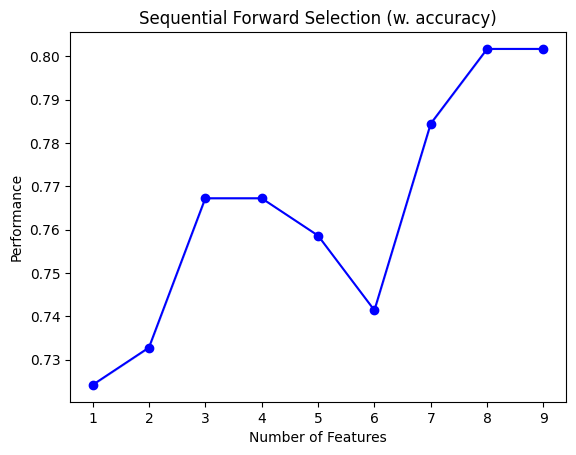

In [23]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# first let's print the chosen features names
print(sfs.k_feature_names_)

# print the accuracy of the model after sequential forward selection
print(sfs.k_score_)

# plot the model accuracy
plot_sfs(sfs.get_metric_dict())
plt.title('Sequential Forward Selection (w. accuracy)')
plt.show()

## **2 - Sequential Backward Selection with mlxtend**

Sequential backward selection (SBS) is a wrapper method for feature selection, closely related to sequential forward selection (SFS). The key distinction lies in its approach: SBS starts with all available features and systematically removes one at a time, in contrast to SFS's additive approach.

### Implementing SBS in mlxtend

To implement SBS in mlxtend, you use the same Sequential Feature Selector (SFS) class as in SFS. The only change is the setting of the forward parameter to False. Here's a quick setup example:

d:\08.project\13.full data science roadmap\Data-Scienc-Roadmap-from-zero-to-hero\.venvRoadmap\Lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:892: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


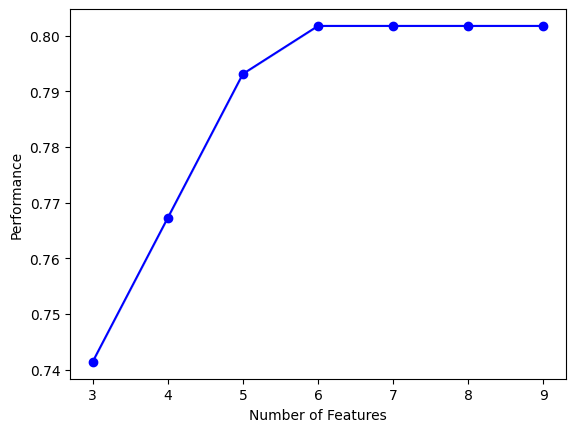

In [25]:
# Set up SBS parameters
sbs = SFS(lr,
          k_features=3, 
          forward=False, 
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit SBS to features X and outcome y
sbs.fit(X, y)

#visualize the results of sequential backward selection.
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sbs.get_metric_dict())
plt.show()

## Exploring Sequential Forward and Backward Floating Selection in Feature Selection

### Understanding Floating Selection Methods

Sequential Forward Floating Selection (SFFS) and Sequential Backward Floating Selection (SBFS) are advanced wrapper methods in feature selection. They build upon the standard Sequential Forward and Backward Selection methods by introducing a dynamic element that allows for a broader evaluation of feature combinations, potentially improving model performance.

### 3 - Sequential Forward Floating Selection (SFFS)

#### How SFFS Works

Initial Phase: SFFS begins without any features, adding them one by one based on the model's performance.
Floating Phase: After each addition, the algorithm checks whether removing any of the existing features (except the newly added one) enhances performance. If so, it removes the least beneficial feature.

### 4- Sequential Backward Floating Selection (SBFS)

#### How SBFS Works
Initial Phase: SBFS starts with all features and systematically removes them one at a time.
Floating Phase: Following each removal, it evaluates whether reintroducing any previously removed features boosts performance. If so, it adds back the most beneficial feature.

('Age', 'Glucose', 'Insulin', 'HOMA', 'Adiponectin')


d:\08.project\13.full data science roadmap\Data-Scienc-Roadmap-from-zero-to-hero\.venvRoadmap\Lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:892: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


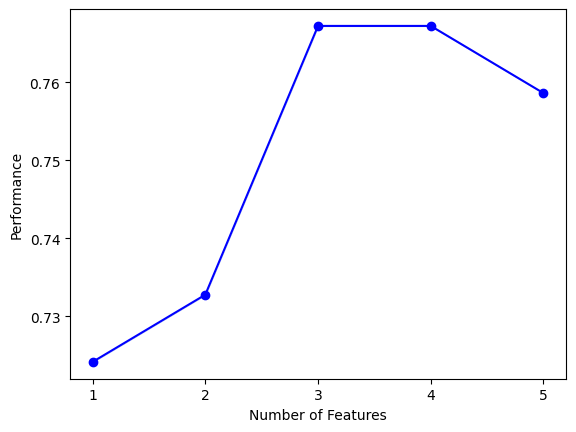

In [28]:
# Sequential forward floating selection
sffs = SFS(lr,
          k_features=5,
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)
#tuple with the names of the features chosen by sequential forward floating selection.
print(sffs.subsets_[5]['feature_names'])

# visualization 
plot_sfs(sffs.get_metric_dict())
plt.show()


('Age', 'Glucose', 'Resistin')


d:\08.project\13.full data science roadmap\Data-Scienc-Roadmap-from-zero-to-hero\.venvRoadmap\Lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:892: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


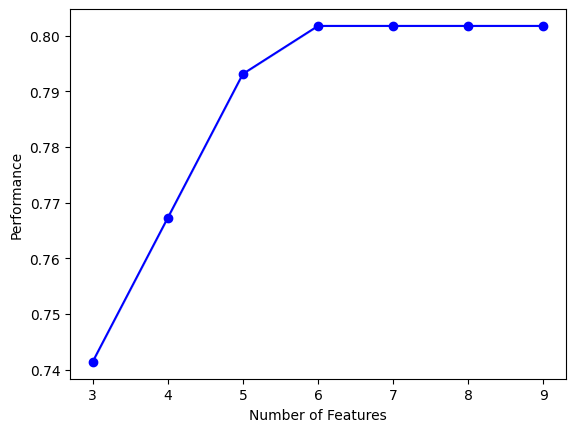

In [29]:
# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=3,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)
# Print a tuple with the names of the features chosen by sequential backward floating selection.
print(sbfs.subsets_[3]['feature_names'])

# visualization
plot_sfs(sbfs.get_metric_dict())
plt.show()

### **5- Recursive Feature Elimination**

Recursive feature elimination (RFE) is a wrapper method for feature selection, distinguished by its unique approach to reducing the feature set in a model.

#### How RFE Works

- Initial Model Training: RFE begins by training a model with all available features.
- Feature Ranking and Removal: Each feature is ranked based on an importance metric, typically the absolute value of its coefficients in regression models. The least important feature is removed.
- Iterative Retraining: The model is retrained with the reduced feature set, and the process of ranking and removal is repeated.
- Termination: This iterative cycle continues until the desired number of features is reached.

[False  True False  True  True False False False False]
[4 1 2 1 1 5 6 3 7]
0.6551724137931034
4
0.7241379310344828


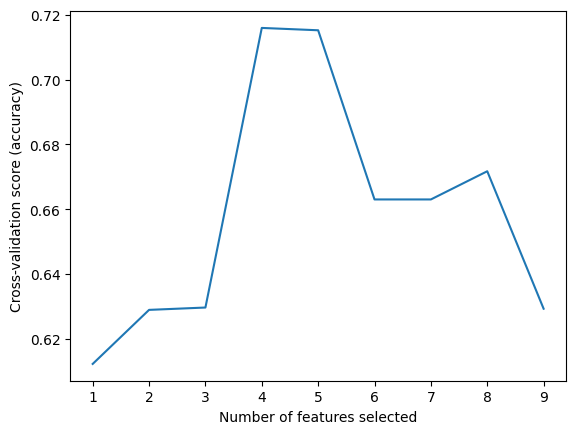

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr, n_features_to_select=3)

# Fit the model
rfe.fit(X, y)

# Print the features 
print(rfe.support_)

# Print the ranking
print(rfe.ranking_)

# Print the accuracy of the model
print(rfe.score(X, y))


# visualize the performance of the model as a function of the number of features
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=lr, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, y)

# Print the optimal number of features
print(rfecv.n_features_)
# Print the accuracy of the model
print(rfecv.score(X, y))

# Visualize the performance of the model as a function of the number of features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## **conclusion**

We covered four different greedy wrapper methods and implemented them using mlextend in Python.
- Sequential forward selection adds one feature at a time.
- Sequential backward selection removes one feature at a time.
- Sequential forward floating selection adds (and sometimes removes) one feature at a time.
- Sequential backward floating selection removes (and sometimes adds) one feature at a time.

We also covered recursive feature elimination, which ranks features by importance and removes the least important feature at every step. We used the scikit-learn library to implement that algorithm and investigate the results.